# PART A

• DOMAIN: Telecom

• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

• PROJECT OBJECTIVE: 

To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import pickle

## Part 1- 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [2]:
Tel_ch1 = pd.read_csv("TelecomCustomer-Churn_1.csv")  # read csv file telecomcustomerchurn-1
Tel_ch1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
print(Tel_ch1.shape) 

(7043, 10)


## Part 1- 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [4]:
Tel_ch2  = pd.read_csv("TelecomCustomer-Churn_2.csv")   # read csv file telecomcustomerchurn-1
Tel_ch2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(Tel_ch2.shape)

(7043, 12)


## Part 1- 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [6]:
df = pd.merge(Tel_ch1,Tel_ch2,on='customerID')  # merge two dataframes as df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print(df.shape)

(7043, 21)


## Part 1- 1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python

In [8]:
print("the number of columns in first data frame is : ",Tel_ch1.shape[1])
print("the column names as : \n " , Tel_ch1.columns)

the number of columns in first data frame is :  10
the column names as : 
  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')


In [9]:
print("the number of columns in second data frame is : ",Tel_ch2.shape[1])
print("the column names as : \n " , Tel_ch2.columns)

the number of columns in second data frame is :  12
the column names as : 
  Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


since we merged the two data frames on customerID column,
I will remove this column

In [10]:
total_churn_columns = (Tel_ch1.shape[1]+Tel_ch2.shape[1])-1
print("The total columns in a merged dataframe are : ",total_churn_columns)

The total columns in a merged dataframe are :  21


In [11]:
if total_churn_columns==df.shape[1]:
    print("All the columns are incorporated in the merged DataFrame")
else :
    print("some columns are missed in the merged DataFrame")

All the columns are incorporated in the merged DataFrame


In [12]:
print("The number of columns in merged dataframe is : ",df.shape[1])
print("The column names in merged dataframe are : \n " , df.columns)

The number of columns in merged dataframe is :  21
The column names in merged dataframe are : 
  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Part 1- 2 a Impute missing/unexpected values in the DataFrame

In [13]:
print("The number of null values present in each column are : \n \n " , df.isnull().sum())

The number of null values present in each column are : 
 
  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


- It seems to be there is no null values present in the dataset

### CHECKING FOR UNEXPECTED VALUES

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

- It seems to be there is some space values present in TotalCharges column

In [16]:
unexpected_val = df.TotalCharges.str.isspace().sum()
print(unexpected_val)

11


In [17]:
print(df[df.TotalCharges.str.isspace()].TotalCharges.value_counts())

     11
Name: TotalCharges, dtype: int64


- Total charges feature having continueous numbers , I am converting this column as float type

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].dtypes)

float64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- It seems to be there is some null values exists in the TotalCharges column after conversion to float type

In [20]:
print("The number of null values present in each column are : \n \n " , df.isnull().sum())

The number of null values present in each column are : 
 
  customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [21]:
print("The percentage  of null values present in each column are : \n \n " , df.isnull().sum()/len(df))

The percentage  of null values present in each column are : 
 
  customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64


In [22]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [23]:
print(df.TotalCharges.describe())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


- We are imputing these missing values with median since the data is skewed

In [24]:
med = df.TotalCharges.median()
print(med)

1397.475


In [25]:
med = df.TotalCharges.median()
df.TotalCharges.fillna(value=med,inplace=True) #replacing null values with median
print("The number of null values in TotalCharges column are : \n" , df.TotalCharges.isnull().sum())

The number of null values in TotalCharges column are : 
 0


In [26]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [27]:
for x in df.columns:
    print("unique values in {} are {}".format(x,df[x].unique()))

unique values in customerID are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unique values in gender are ['Female' 'Male']
unique values in SeniorCitizen are [0 1]
unique values in Partner are ['Yes' 'No']
unique values in Dependents are ['No' 'Yes']
unique values in tenure are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique values in PhoneService are ['No' 'Yes']
unique values in MultipleLines are ['No phone service' 'No' 'Yes']
unique values in InternetService are ['DSL' 'Fiber optic' 'No']
unique values in OnlineSecurity are ['No' 'Yes' 'No internet service']
unique values in OnlineBackup are ['Yes' 'No' 'No internet service']
unique values in DeviceProtection are ['No' 'Yes' 'No internet service']
unique values in TechSupport are ['No' 'Yes' 'No internet service'

In [28]:
for x in df.columns:
    print("unique value counts in {} are {}".format(x,df[x].value_counts()))

unique value counts in customerID are 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
unique value counts in gender are Male      3555
Female    3488
Name: gender, dtype: int64
unique value counts in SeniorCitizen are 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
unique value counts in Partner are No     3641
Yes    3402
Name: Partner, dtype: int64
unique value counts in Dependents are No     4933
Yes    2110
Name: Dependents, dtype: int64
unique value counts in tenure are 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
unique value counts in PhoneService are Yes    6361
No      682
Name: PhoneService, dtype: int64
unique value counts in MultipleLines are No                  3390
Yes                 2971
No p

- Every customer has a unique CustomerID so I am dropping this feature 

In [29]:
df.drop('customerID',axis=1,inplace=True)
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## part 1- 2 b Make sure all the variables with continuous values are of ‘Float’ type

In [30]:
df.info()   # checking info of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


- The continueous variable columns(MonthlyCharges,TotalCharges) all are float

## Part 1- 2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [33]:
#defining a function for pie chart
def piechar(dataframe):
    df_category_feat = df.select_dtypes(include = 'object')
    print("The categorical features are : \n \n " , df_category_feat.columns)
    plt.figure(figsize=(20,20))
    count=1
    x = 0
    for col in df_category_feat.columns:
            plt.subplot(6,3,count)
            plt.pie(df_category_feat.groupby(col).size(),labels=df_category_feat.groupby(col).size().index,autopct='%1.1f%%')
            plt.title(df_category_feat.columns[x])
            count+=1
            x=x+1

The categorical features are : 
 
  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


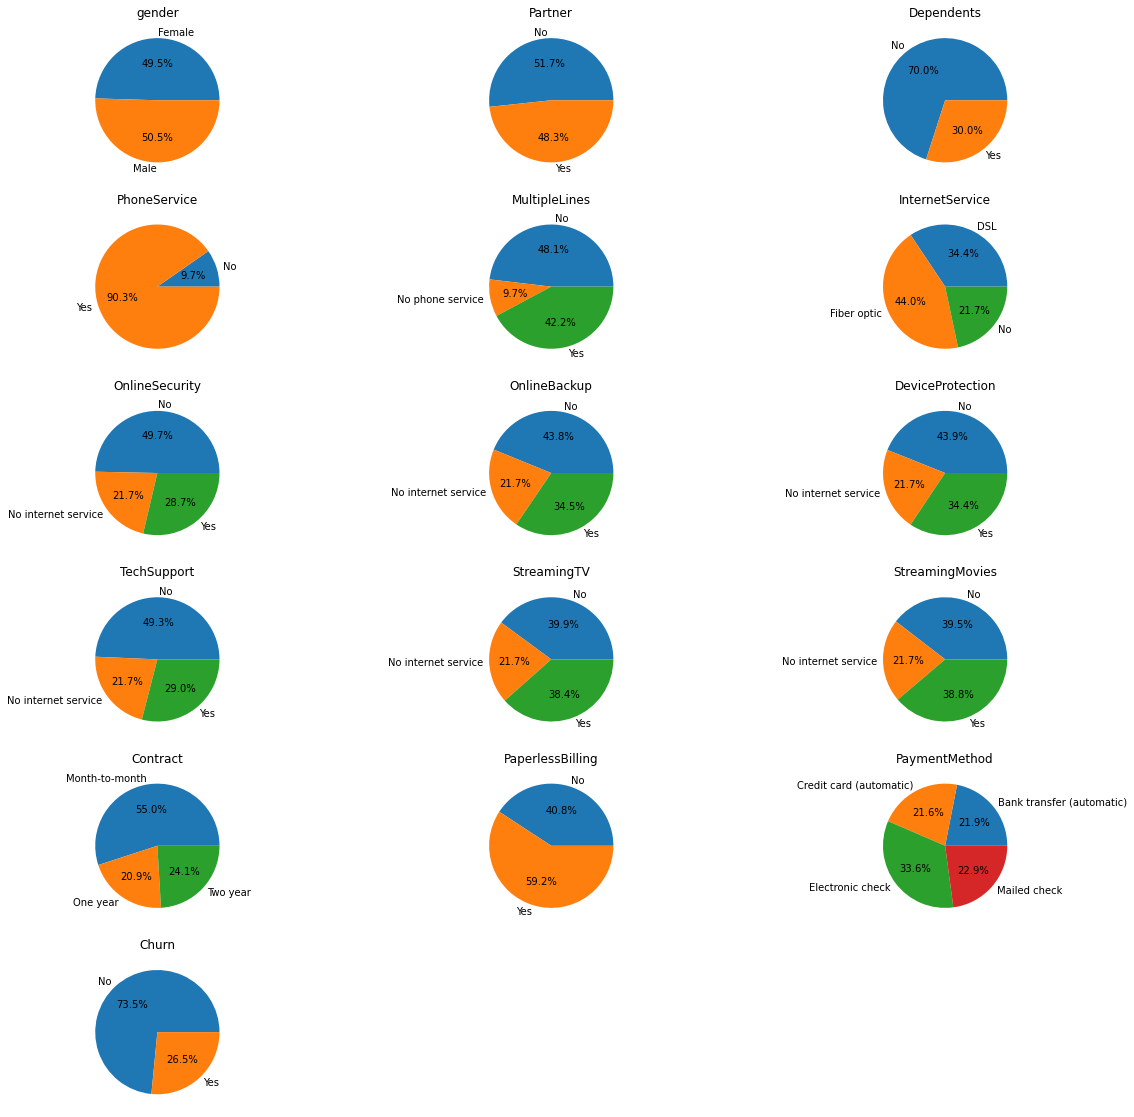

In [34]:
piechar(df)

## Part 1- 2 d.Share insights for Q2.c

### OBSERVATIONS

- By above pie plot the features that having two classes are gender,partner are almost 50:50 ratio 
- The Target feature ('Churn')  are distributed in (73.5:26.5) %  ratio means that it is unequal distribution
- The Target feature is unbalanced
- 'Dependents' feature distributed as 70:30 ratio
- 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies' have three same classes and they distributed as same as
            - 'No internet service' - 21.7%
            - 'No' and 'Yes' are distrbuted approximately as 40:40 ratio
                - Online security  and Tech support feature 'No' and 'Yes' have the classes distributed approximately 
                (49:28) %
- PhoneService having the classes are in the ratio 90:10

## Part 1 - 2 e.Encode all the appropriate Categorical features with the best suitable approach

In [35]:
x = df.loc[:,df.dtypes =='object'].dtypes

In [36]:
for i in df.columns:
    if x.dtypes == 'object' :
        print('Categorial features \t {}  \t and unique values are \n {} \n\n' .format(i,df[i].unique()))
    else:
        print("{} is numerical column".format(i))
    

Categorial features 	 gender  	 and unique values are 
 ['Female' 'Male'] 


Categorial features 	 SeniorCitizen  	 and unique values are 
 [0 1] 


Categorial features 	 Partner  	 and unique values are 
 ['Yes' 'No'] 


Categorial features 	 Dependents  	 and unique values are 
 ['No' 'Yes'] 


Categorial features 	 tenure  	 and unique values are 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 


Categorial features 	 PhoneService  	 and unique values are 
 ['No' 'Yes'] 


Categorial features 	 MultipleLines  	 and unique values are 
 ['No phone service' 'No' 'Yes'] 


Categorial features 	 InternetService  	 and unique values are 
 ['DSL' 'Fiber optic' 'No'] 


Categorial features 	 OnlineSecurity  	 and unique values are 
 ['No' 'Yes' 'No internet service'] 


Categorial features 	 OnlineBackup  	 and uniq

In [37]:
df[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']].head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No phone service,DSL,No,Yes,No,No,No,No
1,No,DSL,Yes,No,Yes,No,No,No
2,No,DSL,Yes,Yes,No,No,No,No
3,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,No,Fiber optic,No,No,No,No,No,No


In [38]:
replaceStruct = {
                "MultipleLines":     {'No phone service': 0, 'No':1, 'Yes':2},
                "InternetService": {"No": 0, 'DSL':1, 'Fiber optic':2},
                 "OnlineSecurity": {'No':1, 'Yes':2, 'No internet service':0},
                 "OnlineBackup":{'No':1, 'Yes':2, 'No internet service':0},
                "DeviceProtection":     {'No':1, 'Yes':2, 'No internet service':0},
                "TechSupport":     {'No':1, 'Yes':2, 'No internet service':0},
                "StreamingTV":     {'No':1, 'Yes':2, 'No internet service':0},
                "StreamingMovies":     {'No':1, 'Yes':2, 'No internet service':0},
                "Churn" : {'No':0, 'Yes':1}
                
                    }
oneHotCols=['gender', 'Partner', 'Dependents', 'PhoneService','Contract', 'PaperlessBilling', 'PaymentMethod']

In [39]:
#encoding categorical variables both nominal and ordinal
df = df.replace(replaceStruct)
df = pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,2,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,1,1,2,1,2,1,1,1,...,1,0,1,0,1,0,0,0,0,1
2,0,2,1,1,2,2,1,1,1,1,...,1,1,0,0,0,1,0,0,0,1
3,0,45,0,1,2,1,2,2,1,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,1,2,1,1,1,1,1,1,...,1,1,0,0,0,1,0,0,1,0
5,0,8,2,2,1,1,2,1,2,2,...,1,1,0,0,0,1,0,0,1,0
6,0,22,2,2,1,2,1,1,2,1,...,1,1,0,0,0,1,0,1,0,0
7,0,10,0,1,2,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
8,0,28,2,2,1,1,2,2,2,2,...,1,1,0,0,0,1,0,0,1,0
9,0,62,1,1,2,2,1,1,1,1,...,1,0,1,0,1,0,1,0,0,0


In [40]:
print(df.shape)

(7043, 30)


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MultipleLines                            7043 non-null   int64  
 3   InternetService                          7043 non-null   int64  
 4   OnlineSecurity                           7043 non-null   int64  
 5   OnlineBackup                             7043 non-null   int64  
 6   DeviceProtection                         7043 non-null   int64  
 7   TechSupport                              7043 non-null   int64  
 8   StreamingTV                              7043 non-null   int64  
 9   StreamingMovies                          7043 non-null   int64  
 10  MonthlyCharges                           7043 no

## Part 1- 2 f.Split the data into 80% train and 20% test.

In [42]:
X = df.drop('Churn',axis=1)
Y = df['Churn']

In [43]:
print(X.shape)
X.head()

(7043, 29)


,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,2,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,1,1,2,1,2,1,1,1,...,1,0,1,0,1,0,0,0,0,1
2,0,2,1,1,2,2,1,1,1,1,...,1,1,0,0,0,1,0,0,0,1
3,0,45,0,1,2,1,2,2,1,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,1,2,1,1,1,1,1,1,...,1,1,0,0,0,1,0,0,1,0


## Part 1 - 2 g.Normalize/Standardize the data with the best suitable approach

In [44]:
scaler = MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X_scaled = pd.DataFrame(d, columns=names)
print(X_scaled.shape)
X_scaled.head()

(7043, 29)


,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.5,0.5,1.0,0.5,1.0,0.5,0.5,0.5,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.0,0.5,1.0,0.5,1.0,1.0,0.5,0.5,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
print(X_scaled.dtypes)

SeniorCitizen                              float64
tenure                                     float64
MultipleLines                              float64
InternetService                            float64
OnlineSecurity                             float64
OnlineBackup                               float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                              float64
gender_Male                                float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes               

In [46]:
# split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
# the shape of training data 
x_train.shape,y_train.shape

((5634, 29), (5634,))

In [47]:
x_train.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0.0,0.291667,0.5,0.5,1.0,0.5,1.0,0.5,0.5,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1623,0.0,0.750000,1.0,1.0,0.5,1.0,0.5,0.5,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
6074,0.0,0.013889,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1362,0.0,0.055556,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6754,0.0,0.000000,1.0,0.5,1.0,1.0,0.5,1.0,0.5,0.5,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## Part 1 - 3 a. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [48]:
xgb = XGBClassifier()

In [49]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [50]:
y_pred_tr = xgb.predict(x_train) # predicted values for training
y_pred = xgb.predict(x_test)   # predicted values for testing

In [51]:
def classify(model):
    print("*-*"*20)
    print("Training scores are  : \n ")
    print("Training score is " , model.score(x_train,y_train))
    print("-"*50)
    print(classification_report(y_train,y_pred_tr))
    cm_tr = confusion_matrix(y_train,y_pred_tr)
    plt.subplots(1,1)
    sns.heatmap(cm_tr,annot=True,fmt = "3g")
    plt.title("CONFUSION MATRIX FOR TRAINING")
    print("*-*"*20)
    print("Testing scores are  : \n ")
    print("Testing score is " , model.score(x_test,y_test))
    print("-"*50)
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    plt.subplots(1,1)
    sns.heatmap(cm,annot=True,fmt = "3g")
    plt.title("CONFUSION MATRIX FOR TESTING")
    print("AUC SCORE IS :" ,roc_auc_score(y_test,y_pred))

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training scores are  : 
 
Training score is  0.9364572239971601
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4138
           1       0.91      0.85      0.88      1496

    accuracy                           0.94      5634
   macro avg       0.93      0.91      0.92      5634
weighted avg       0.94      0.94      0.94      5634

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Testing scores are  : 
 
Testing score is  0.7906316536550745
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      14

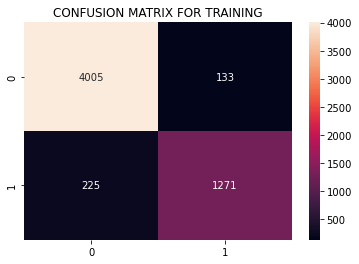

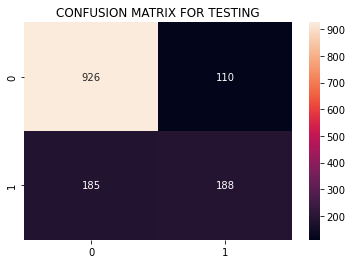

In [52]:
classify(xgb)

In [53]:
print("Training score is " , xgb.score(x_train,y_train))
print("Testing score is " , xgb.score(x_test,y_test))

Training score is  0.9364572239971601
Testing score is  0.7906316536550745


## Part 1 - 3 b Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

### A) Learning rate 

In [54]:
lr_rate = np.arange(0.1,1.0,0.1)

ac_scores = []

for x in lr_rate:
    xgb = XGBClassifier(learning_rate=x)
    xgb.fit(x_train,y_train)
    print("train" , xgb.score(x_train,y_train))
    print("test " ,xgb.score(x_test,y_test))
    print("*"*60)
    scores = xgb.score(x_test,y_test)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best optimal learning rate
optimal_lr_rate = lr_rate[MSE.index(min(MSE))]

print("The optimal learning rate is ", optimal_lr_rate)


train 0.8684771033013845
test  0.8026969481902059
************************************************************
train 0.9101881434149804
test  0.7856635911994322
************************************************************
train 0.9364572239971601
test  0.7906316536550745
************************************************************
train 0.9600638977635783
test  0.7877927608232789
************************************************************
train 0.9724884629037983
test  0.7863733144073811
************************************************************
train 0.9829605963791267
test  0.7877927608232789
************************************************************
train 0.9884629037983671
test  0.7842441447835344
************************************************************
train 0.9900603478878239
test  0.7757274662881476
************************************************************
train 0.9948526801561945
test  0.7771469127040455
************************************************************
T

### B) Max depth

In [55]:
max_depth=np.arange(1,10)
ac_scores = []

for x in max_depth:
    xgb = XGBClassifier(learning_rate=0.1,max_depth = x)
    xgb.fit(x_train,y_train)
    print("train" , xgb.score(x_train,y_train))
    print("test " ,xgb.score(x_test,y_test))
    print("*"*60)
    scores = xgb.score(x_test,y_test)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best max_depth
optimal_max_depth = max_depth[MSE.index(min(MSE))]

print("The optimal max_depth is : ", optimal_max_depth)


train 0.8008519701810437
test  0.8048261178140526
************************************************************
train 0.8111466098686546
test  0.8126330731014905
************************************************************
train 0.8191338303159389
test  0.8097941802696949
************************************************************
train 0.8306709265175719
test  0.8112136266855926
************************************************************
train 0.84806531771388
test  0.8048261178140526
************************************************************
train 0.8684771033013845
test  0.8026969481902059
************************************************************
train 0.8974085906993255
test  0.8041163946061036
************************************************************
train 0.9192403265885694
test  0.7998580553584103
************************************************************
train 0.941782037628683
test  0.78708303761533
************************************************************
The op

### C) n_estimators

In [56]:
n_estimators= np.arange(10,100,10)
ac_scores = []

for x in n_estimators:
    xgb = XGBClassifier(learning_rate=0.1,max_depth = 2,n_estimators = x)
    xgb.fit(x_train,y_train)
    print("train" , xgb.score(x_train,y_train))
    print("test " ,xgb.score(x_test,y_test))
    print("*"*60)
    scores = xgb.score(x_test,y_test)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best n_estimators
optimal_n_est = n_estimators[MSE.index(min(MSE))]

print("The optimal number of n_estimators is ", optimal_n_est)


train 0.7882499112531062
test  0.794889992902768
************************************************************
train 0.7870074547390842
test  0.7899219304471257
************************************************************
train 0.7953496627618033
test  0.7998580553584103
************************************************************
train 0.8013844515441959
test  0.8048261178140526
************************************************************
train 0.8004969826056088
test  0.8119233498935415
************************************************************
train 0.80386936457224
test  0.8126330731014905
************************************************************
train 0.8042243521476748
test  0.8133427963094393
************************************************************
train 0.8084842030528931
test  0.8119233498935415
************************************************************
train 0.8091941782037628
test  0.8097941802696949
************************************************************
The 

### D) colsample_bytree

In [57]:
colsample_bytree=np.arange(0.1,1.0,0.1)
ac_scores = []
for x in colsample_bytree:
    xgb = XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators= 70,colsample_bytree=x)
    xgb.fit(x_train,y_train)
    print("train" , xgb.score(x_train,y_train))
    print("test " ,xgb.score(x_test,y_test))
    print("*"*60)
    scores = xgb.score(x_test,y_test)
    ac_scores.append(scores)
    
MSE = [1 - x for x in ac_scores]

# determining best optimal col sample
optimal_col_sam = colsample_bytree[MSE.index(min(MSE))]

print("The optimal_col_sample is ", optimal_col_sam)


train 0.7988995385161519
test  0.794889992902768
************************************************************
train 0.8059992900248492
test  0.8147622427253371
************************************************************
train 0.8059992900248492
test  0.8161816891412349
************************************************************
train 0.8065317713880015
test  0.8176011355571328
************************************************************
train 0.8084842030528931
test  0.8168914123491838
************************************************************
train 0.8052893148739794
test  0.8105039034776437
************************************************************
train 0.8070642527511537
test  0.8090844570617459
************************************************************
train 0.8059992900248492
test  0.808374733853797
************************************************************
train 0.8059992900248492
test  0.8126330731014905
************************************************************
The

### E) gamma

In [58]:
gamma=np.arange(0.1,0.5,0.1)
ac_scores = []
for x in gamma:
    xgb = XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators= 70,colsample_bytree=0.4,gamma=x)
    xgb.fit(x_train,y_train)
    print("train" , xgb.score(x_train,y_train))
    print("test " ,xgb.score(x_test,y_test))
    print("*"*60)
    scores = xgb.score(x_test,y_test)
    ac_scores.append(scores)
    
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_gamma = gamma[MSE.index(min(MSE))]

print("The optimal number of neighbors is ", optimal_gamma)


train 0.8065317713880015
test  0.8176011355571328
************************************************************
train 0.8059992900248492
test  0.815471965933286
************************************************************
train 0.8059992900248492
test  0.815471965933286
************************************************************
train 0.8059992900248492
test  0.815471965933286
************************************************************
The optimal number of neighbors is  0.1


### F) subsample

In [59]:
subsample=np.arange(0.1,1.0,0.1)
ac_scores = []
for x in subsample:
    xgb = XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators= 70,colsample_bytree=0.4,gamma=.1,subsample = x)
    xgb.fit(x_train,y_train)
    print("train" , xgb.score(x_train,y_train))
    print("test " ,xgb.score(x_test,y_test))
    print("*"*60)
    scores = xgb.score(x_test,y_test)
    ac_scores.append(scores)
    
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_sub_sam = subsample[MSE.index(min(MSE))]

print("The optimal number of neighbors is ", optimal_sub_sam)

train 0.8097266595669151
test  0.8176011355571328
************************************************************
train 0.8068867589634363
test  0.8161816891412349
************************************************************
train 0.8047568335108272
test  0.8133427963094393
************************************************************
train 0.8056443024494143
test  0.8140525195173882
************************************************************
train 0.807596734114306
test  0.8119233498935415
************************************************************
train 0.807596734114306
test  0.815471965933286
************************************************************
train 0.8052893148739794
test  0.8126330731014905
************************************************************
train 0.8065317713880015
test  0.8126330731014905
************************************************************
train 0.8056443024494143
test  0.8119233498935415
************************************************************
The 

### The best performing Parameters are 

- learning rate
- max_depth
- n_estimators
- col_sample_bytree

In [60]:
xgb_final = XGBClassifier(learning_rate = 0.1,max_depth=2,n_estimators= 70,colsample_bytree=0.4)

In [61]:
xgb_final.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
y_pred_tr = xgb_final.predict(x_train)
y_pred = xgb_final.predict(x_test)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training scores are  : 
 
Training score is  0.8065317713880015
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      4138
           1       0.68      0.50      0.58      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.71      0.73      5634
weighted avg       0.80      0.81      0.80      5634

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Testing scores are  : 
 
Testing score is  0.8176011355571328
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1036
           1       0.70      0.55      0.61       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      14

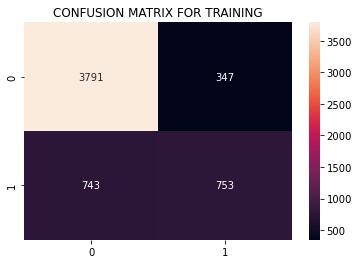

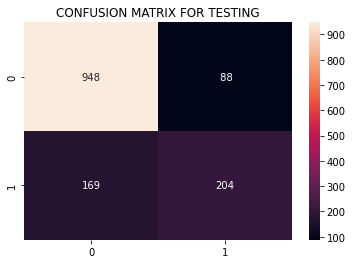

In [63]:
classify(xgb_final)

- Accuracy score improved by 2.7%
- Precision score improved by 3%
- Recall score improved by 3%
- f1 score improved by 3%
- AUC score improved by 3%

# PART - B

• DOMAIN: IT

• CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.

• PROJECT OBJECTIVE: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

• STEPS AND TASK [30 Marks]:

1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use
1 Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.

In [64]:
a = "TelecomCustomer-Churn_1.csv"
b = "TelecomCustomer-Churn_2.csv"

### Read csv file function

In [65]:
def read_csv(a,b):
    global df                       #declaring df as global variable for future use
    df1 = pd.read_csv(a) 
    df2 = pd.read_csv(b)
    df = pd.merge(df1,df2,on = "customerID") # we are now considering the merged datafile
    print("\t\t\t\t  \033[1m{}\033[0m " .format("TELECOM CHURN "))
    print("*-*"*30)
    return df.head()

In [66]:
read_csv(a,b)

				  TELECOM CHURN  
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Gathering information about data

In [67]:
def data_info(df):
            print('*'*50)
            print("the number of columns are : " , df.shape[1])       # to check the nummber of columns
            print("the number of rows are :" , df.shape[0])           # to check the number of rows
            print('*'*50)
            #for column names
            
            print("column names are in dataframe  : \n " , df.columns)  
            print('*'*50)
            print("The data information as :\n" ,"*"*50)
            
            #for checking datatypes and information about the data
            print(df.info())

In [68]:
# to know about statistical information

def data_stats(df):
            print("The statistical information as follows : \n" , '*'*50)
            print(df.describe().T)

In [69]:
# combining information about data in a function

def data_view():
    data_info(df)
    data_stats(df)

In [70]:
data_view()

**************************************************
the number of columns are :  21
the number of rows are : 7043
**************************************************
column names are in dataframe  : 
  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
**************************************************
The data information as :
 **************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   obj

### Removing the Unneccesary columns

In [71]:
def unnec_colmn(df):
    df.drop('customerID',axis = 1,inplace = True)
    return df.head()

### Missing values and Their Imputation

In [72]:
def mis_values(df):
    print("*"*50)
    # to check the standard missing values
    print("Standard missing values are : \n \n " , df.isnull().sum()/df.shape[0])

In [73]:
# to check unexpexted values

def unexp(df):
            df_category_feat = df.select_dtypes(include = 'object') # creating an object for the categorical featues
            for x in df_category_feat.columns:                      # to check the unexpected values in categorical features
                    if df[x].str.isspace().sum() == 0:
                        
                        print('The {} column having no space'.format(x))
                        
                    else:
                        
                        print('The {} column having space and the value is {}'.format(x,df[x].str.isspace().sum()))
                        
                        print("*"*50)
                        # the number of unexpected values
                        print("the columns {} having the spaces are {} ".format(x,df[df[x].str.isspace()][x].value_counts()))
                        print("*"*50)
                        # converting the unexpected value feature to numeric type
                        df[x] = pd.to_numeric(df[x],errors='coerce')
                        print("*"*50)
                        print("the datatype of the column is " , df[x].dtypes)

In [74]:
# imputing the missing values
def misvalu_imp(df):
    print("Standard missing values are : \n \n " , df.isnull().sum()/df.shape[0])
    print("--"*50)
    for x in df.columns:
        if df[x].isnull().sum() == 0 :
            print("the column {} No imputation required " .format(x))
        else:
            print("*"*50)
            print("the column {} imputation required ".format(x))
            print("the column {} Imputation can be done as median ".format(x))
            print("*"*50)
            df[x] = df[x].fillna(df[x].median())
    print("*"*50)
    print("Standard missing values are : \n \n " , df.isnull().sum()/df.shape[0])
            

### Data visualisation 

In [75]:
def dat_vis(df):
    df_num_feat = df.select_dtypes(include = ('int64','float64'))
    df_category_feat = df.select_dtypes(include = 'object')
    df_category_feat.drop('customerID',axis = 1,inplace= True)
    df_category_feat.drop('TotalCharges',axis = 1,inplace= True)
    plt.figure(figsize=(20,20))
    count=1
    x = 0
    print("Pie chart for categorical columns : \n " ,"*" * 50)
    for col in df_category_feat.columns:
            plt.subplot(6,3,count)
            plt.pie(df_category_feat.groupby(col).size(),labels=df_category_feat.groupby(col).size().index,autopct='%1.1f%%')
            plt.title(df_category_feat.columns[x])
            count+=1
            x=x+1
    plt.figure(figsize=(6,3))
    df_num_feat.boxplot();
    df_num_feat.hist(figsize=(15,8));

Pie chart for categorical columns : 
  **************************************************


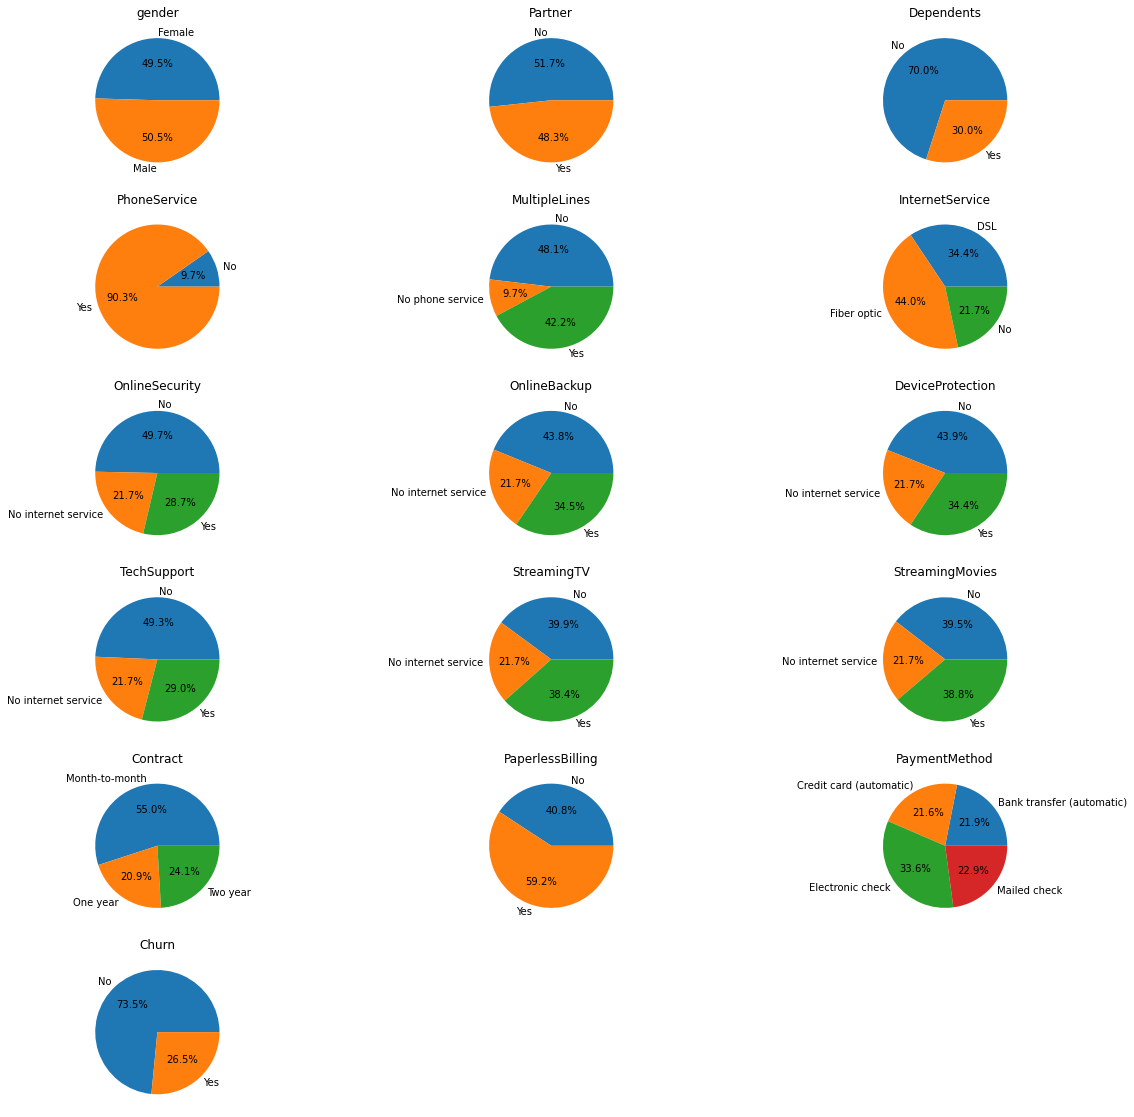

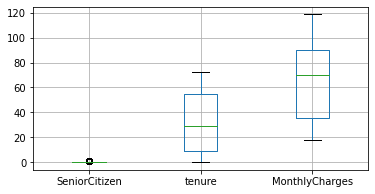

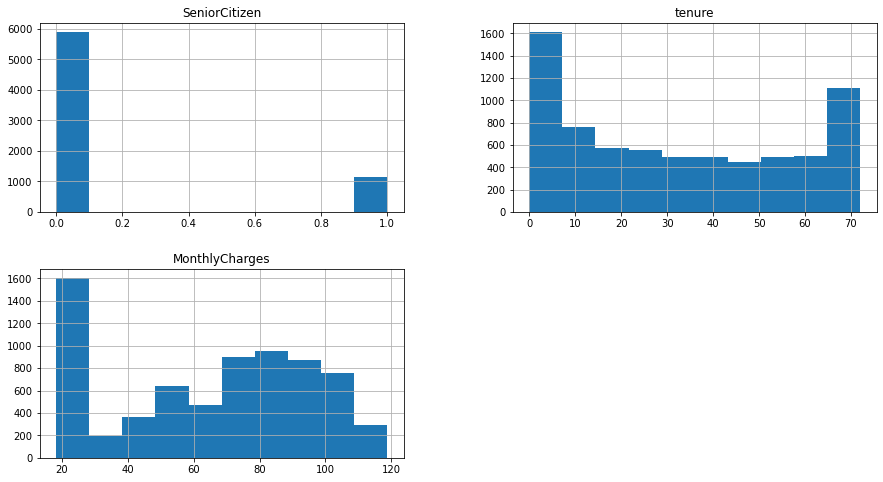

In [76]:
dat_vis(df)

### Encoding the Categorical Variables

In [77]:
def encoder(df):
    global df3
    # encoding the ordinal categorical columns 
    replaceStruct = {
                "MultipleLines":     {'No phone service': 0, 'No':1, 'Yes':2},
                "InternetService": {"No": 0, 'DSL':1, 'Fiber optic':2},
                 "OnlineSecurity": {'No':1, 'Yes':2, 'No internet service':0},
                 "OnlineBackup":{'No':1, 'Yes':2, 'No internet service':0},
                "DeviceProtection":     {'No':1, 'Yes':2, 'No internet service':0},
                "TechSupport":     {'No':1, 'Yes':2, 'No internet service':0},
                "StreamingTV":     {'No':1, 'Yes':2, 'No internet service':0},
                "StreamingMovies":     {'No':1, 'Yes':2, 'No internet service':0},
                "Churn" : {'No':0, 'Yes':1}
                
                    }
    #encoding the nominal categorical columns
    oneHotCols=['gender', 'Partner', 'Dependents', 'PhoneService','Contract', 'PaperlessBilling', 'PaymentMethod']
    
    #encoding categorical columns  
    df = df.replace(replaceStruct)
    df3 = pd.get_dummies(df, columns=oneHotCols)
    
    return df3.head()


### Preprocessing function

In [78]:
def preprocessing():
    unnec_colmn(df)
    mis_values(df)
    unexp(df)
    misvalu_imp(df)
    encoder(df)

In [79]:
preprocessing()

**************************************************
Standard missing values are : 
 
  gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64
The gender column having no space
The Partner column having no space
The Dependents column having no space
The PhoneService column having no space
The MultipleLines column having no space
The InternetService column having no space
The OnlineSecurity column having no space
The OnlineBackup column having no space
The DeviceProtection column having no space
The TechSupport column having no space
The StreamingTV column 

### Split data into dependent and independent  

In [80]:
def split(df3):
    global X,Y        #declaring X,Y as global 
    for x in encoder(df):
        X = df3.drop('Churn',axis = 1)
        Y = df3['Churn']
        return X.columns

### Scaling data

In [81]:
def scale(X):
    global X_scaled
    scaler = MinMaxScaler()   # scaling the data
    d = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(d, columns=X.columns)
    return X_scaled.head()

### In-sample data and Out-sample data

In [82]:
 def tr_tst_split():
        global x_train,y_train,x_test,y_test    # training and testing data for model declared as global
        x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
        return x_train.head()

### Final data for Model buliding

In [83]:
def split_data_train_test():
    split(df3)
    scale(X)
    tr_tst_split()

In [84]:
split_data_train_test()

### Classification models

In [85]:
def classification_models():
    global models
    # base classification models
    lgt = LogisticRegression()
    nb = GaussianNB()
    svm = SVC()
    dtree = DecisionTreeClassifier()
    rand_frst = RandomForestClassifier()
    knn = KNeighborsClassifier()
    bagging = BaggingClassifier()
    ada_boost = AdaBoostClassifier()
    xgb = XGBClassifier()
    models = (lgt,nb,svm,dtree,rand_frst,knn,bagging,ada_boost,xgb)

### Training the model

In [86]:
# Training the model
def classify(models):
        global pred_train,pred_test
        for model in models:
            model.fit(x_train,y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

### Performance measures

In [87]:
# performance metrics for each model
def metrics(classifier):
    classify(models)
    for classifier in models:
        print("*-*"*50)
        print("MODEL :" , classifier)
        print('Training Performace')
        print("accuracy score ", classifier.score(x_train,y_train))
        print("--"*50)
        print(classification_report(y_train,pred_train))
        print('*'*50)
        print('Testing Performace')
        print("accuracy score ", classifier.score(x_test,y_test))
        print("--"*50)
        print(classification_report(y_test,pred_test))
        cm = confusion_matrix(y_test,pred_test)
        print("CONFUSION MATRIX : \n" , cm)

### Trained models and Performance measures 

In [88]:
# different classifiction models and their metrics
def models_metrics():
    classification_models()
    classify(models)
    metrics(models)

### For  Best model function

In [89]:
# to get best classification model
def best_model(models):
    global BEST_MODEL  #declaring as global for pickling
    ac_scores = []
    for model in models:
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        scores = model.score(x_test,y_test)
        ac_scores.append(scores)
        #Misclassification error MSE
        MSE = [1 - i for i in ac_scores]
        BEST_MODEL = models[MSE.index(min(MSE))]
        
    print("\n")
    print("*"*50)
    print("The best model is :", BEST_MODEL)
    print("*"*50)

### Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use one Dataset from Part 1 (single/merged).

In [90]:
# defining a function which accepts a single .csv file

def load_csv_best_model(a):
    # seperate functions for different purposes
    read_csv(a,b)              # read csv files and return merged dataframe
    data_view()                # brief view for understanding the data
    preprocessing()            # preprocessing the data
    split_data_train_test()    # split the data into train and test make it ready for model buliding
    classification_models()    # Classifiaction model
    models_metrics()           # performance metrics for each model
    best_model(models)         # out of all models which one performs best

In [91]:
load_csv_best_model(a)

				  TELECOM CHURN  
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
**************************************************
the number of columns are :  21
the number of rows are : 7043
**************************************************
column names are in dataframe  : 
  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
**************************************************
The data information as :
 **************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            

### Pickle file should be saved for the best performing model.

In [92]:
def pickle_file_best_model():
    print("Pickle file saved for the best performing model.")
    pickle.dump(BEST_MODEL,open("ET_P2_BESTMODEL.pkl","wb"))

In [93]:
pickle_file_best_model()

Pickle file saved for the best performing model.
